# WOORDY TWEEETS ANALYSIS
- Youtube inspired

In [58]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
df = pd.read_csv('tweets.csv')
df.head(3)

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩


## Data cleaning

Summary of the job i did:
- clean up date format
- extract woordy id
- extract number of attemps
- make square color consistent


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234186 entries, 0 to 234185
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   wordle_id       234186 non-null  int64 
 1   tweet_id        234186 non-null  int64 
 2   tweet_date      234186 non-null  object
 3   tweet_username  234186 non-null  object
 4   tweet_text      234186 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.9+ MB


In [61]:
def process_tweets(tweets):
    
    """ 
    the func cleans up date time
    extract woordy id and the number of attemps
    """

    df['date_time']  = pd.to_datetime(df['tweet_date'])
    df['date']  = df['date_time'].dt.date
    df.drop('tweet_date', axis =1, inplace =True)

    df['wordle_id'] = df['tweet_text'].str[:10]
    df['wordle_id_num'] = df['tweet_text'].str[7:10].astype('int')
    df['n_attemps'] = df['tweet_text'].str[11].astype('int')
    
    return tweets

In [62]:
 df = process_tweets(df)

In [63]:
df.head(2)

,wordle_id,tweet_id,tweet_username,tweet_text,date_time,date,wordle_id_num,n_attemps
0,Wordle 210,1482553374591660037,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,2022-01-16,210,4
1,Wordle 210,1482553387937898499,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,2022-01-16,210,4


In [64]:
df['tweet_text'] = df['tweet_text'].str.replace('⬜', '⬛')

In [65]:
df.describe()

,tweet_id,wordle_id_num,n_attemps
count,2.341860e+05,234186.000000,234186.000000
mean,1.490261e+18,231.502797,4.134743
std,3.931855e+15,10.910884,1.095506
min,1.482553e+18,210.000000,2.000000
25%,1.487079e+18,223.000000,3.000000
50%,1.490152e+18,231.000000,4.000000
75%,1.493090e+18,239.000000,5.000000
max,1.497413e+18,251.000000,6.000000


## Start exploration

<AxesSubplot:title={'center':'Woordle tweets by day'}>

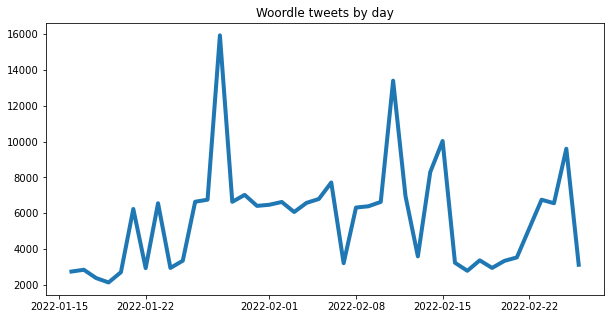

In [66]:
df['date'].value_counts() \
    .plot(figsize=(10,5), title = 'Woordle tweets by day', lw = 4)

### Most common number of attemps

In [67]:
df.groupby('wordle_id')['n_attemps'].value_counts() \
    .unstack() \
    .style.background_gradient(axis = 1)

n_attemps,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


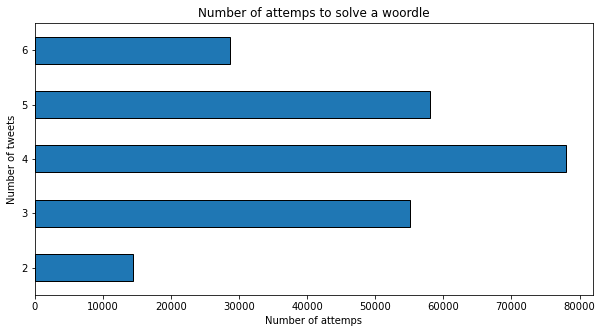

In [68]:
ax = df['n_attemps'].value_counts() \
    .sort_index() \
    .plot(figsize = (10,5),
          kind = 'barh',
         title = 'Number of attemps to solve a woordle',
         edgecolor = 'black')
ax.set_xlabel('Number of attemps')
ax.set_ylabel('Number of tweets')
plt.show()

In [80]:


def parse_tweet_text(df):
    for n in range(6):
        n += 1
        df[f'has_guess{n}'] = df['tweet_text'].str.split('\n').str[n+1] \
            .str.contains('|'.join(['🟨','⬛','🟩'])) \
            .fillna(False)

        # Parse out the tweet text
        df.loc[df[f'has_guess{n}'], f'guess{n}'] = \
                df['tweet_text'].str.split('\n').str[n + 1].str[:5]
        # Count number correct, misplaced, and incorrect
        df.loc[df[f'has_guess{n}'],
                       f'guess{n}_incorrect'] = df[f'guess{n}'].str.count('⬛')
        df.loc[df[f'has_guess{n}'],
                   f'guess{n}_wrong_spot'] = df[f'guess{n}'].str.count('🟨')
        df.loc[df[f'has_guess{n}'],
                   f'guess{n}_correct'] = df[f'guess{n}'].str.count('🟩')
        
        df.loc[df[f'guess{n}_correct'] == 5, 'final_guess'] = n
    return df

df = parse_tweet_text(df)

In [85]:
df['additional_tweet_text'] = \
    df.loc[~df['tweet_text'] \
    .str.split('\n').str[-1].str.contains('🟩')] \
    ['tweet_text'].str.split('\n').str[-1]

## Plot results by attempt

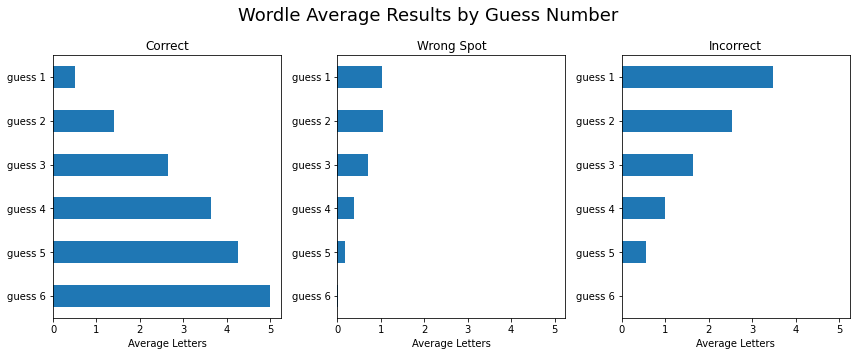

In [107]:

 
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in df.columns if x in c]
    guess_avg = df[col_subset].mean()
    guess_avg.index = [f'guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
              title=f'{x.strip("_").replace("_"," ").title()}',
              ax=axs[i])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()